[ENGIE’s first open data windfarm](https://opendata-renewables.engie.com/)

[La Haute Borne Data (2017-2020)](https://opendata-renewables.engie.com/explore/dataset/01c55756-5cd6-4f60-9f63-2d771bb25a1a/table)

[Data Descriptions](https://opendata-renewables.engie.com/explore/dataset/39490fd2-04a2-4622-9042-ce4dd34c2a58/information)

Article:
    [Guidelines for a preliminary windfarm data-driven analysis](https://medium.com/@mbonanomi/guidelines-for-a-preliminary-windfarm-data-driven-analysis-f4793f840ef2)

# Pickle & Unpickle windfarm

In [1]:
import pandas as pd
import numpy as np
import re
import pickle
import string
import datetime
import warnings
import os


# Plots
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from windrose import WindroseAxes
import matplotlib.cm as cm
%matplotlib inline

# Display data tools
from IPython.display import display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Analysis Tools
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.metrics import make_scorer,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/jcnachman/anaconda3/envs/metis/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent fu

In [2]:
windfarm2016 = pd.read_pickle("./windfarm2016.pkl")
windfarm2016

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
13872,R80736,2016-11-26T20:30:00+01:00,2016-11-26,19:30:00,2016,11,90.000000,90.000000,90.000000,0.00,16.040001,16.000000,17.00,0.15,4.21000,4.130000,4.28000,0.030000,25.370001,24.980000,25.680000,0.120000,-0.150000,-0.440000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.150000,0.000000,0.440000,0.080000,1.00,1.00,1.00,0.00,0.000000,0.000000,0.00000,0.000000,19.889999,19.700001,19.900000,0.04,16.830000,16.799999,17.000000,0.06,21.549999,21.400000,21.600000,0.08,26.100000,26.000000,26.100000,0.01,26.700001,26.700001,26.799999,0.01,25.420000,24.799999,25.600000,0.22,29.200001,29.100000,29.299999,0.01,234.030000,234.030000,234.030000,0.00,15.990000,15.800000,16.000000,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,133.670000,123.090000,143.130000,5.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.37,-110.940000,-90.900002,5.510000,9.00,8.8,9.05,0.02,50.000000,49.959999,50.029999,0.01,695.89001,694.01001,698.37000,0.81,0.000000,0.000000,0.00,0.00,17.299999,17.299999,17.400000,0.01,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,133.670000,NaN,NaN,NaN,133.670000,NaN,NaN,NaN
13875,R80736,2016-11-26T22:30:00+01:00,2016-11-26,21:30:00,2016,11,90.000000,90.000000,90.000000,0.00,16.000000,16.000000,16.00,0.00,4.07000,4.030000,4.10000,0.010000,24.190001,23.980000,24.360001,0.060000,-0.130000,-0.430000,0.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.130000,0.000000,0.430000,0.070000,1.00,1.00,1.00,0.00,0.000000,0.000000,0.00000,0.000000,19.260000,19.100000,19.299999,0.07,16.200001,16.100000,16.200001,0.00,20.500000,20.400000,20.500000,0.01,25.299999,25.250000,25.500000,0.02,25.900000,25.850000,25.900000,0.01,24.570000,24.250000,24.799999,0.08,28.190001,28.100000,28.200001,0.02,234.030000,234.030000,234.030000,0.00,15.830000,15.800000,16.000000,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,150.060000,123.090000,205.460010,25.150000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.00,-110.930000,-28.559999,25.150000,8.66,8.5,8.75,0.07,50.020000,49.990002,50.040001,0.01,696.19000,693.65002,698.51001,1.47,0.000000,0.000000,0.00,0.00,17.000000,16.950001,17.000000,0.00,0.000000,0.00000,0.000000,0.000000,NaN,NaN,NaN,NaN,150.060000,NaN,NaN,NaN,150.060000,NaN,NaN,NaN
13878,R80736,2016-11-30T00:40:00+01:00,2016-11-29,23:40:00,2016,11,45.000000,45.000000,45.000000,0.00,9.000000,9.000000,9.94,0.05,94.43000,73.129997,107.93000,8.530000,28.719999,28.450001,28.969999,0.080000,-1.310000,-1.780000,-0.930000,0.140000,0.000000,0.000000,0.090000,0.000000,1.310000,0.930000,1.780000,0.140000,1.00,1.00,1.00,0.00,90.470001,68.980003,104.04000,8.520001,41.369999,41.200001,41.599998,0.12,35.139999,34.900002,35.500000,0.14,54.889999,54.599998,55.400002,0.21,46.560001,46.400002,46.599998,0.07,47.500000,47.299999,47.700001,0.14,47.549999,47.200001,47.900002,0.15,49.990002,49.799999,50.200001,0.10,81.459999,81.459999,81.459999,0.00,21.459999,2

In [3]:
windfarm = pd.read_pickle("./windfarm.pkl")
windfarm

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,R80721,2017-02-08T08:00:00+01:00,2017-02-08,07:00:00,2017,2,44.990002,44.990002,44.990002,0.00,14.00,14.00,14.0,0.00,38.369999,17.6800,52.41000,9.390000,2.39,2.06,2.69,0.09,-1.89000,-2.36000,-1.40000,0.150000,0.000000,0.000000,0.000000,0.00,1.89000,1.40000,2.36000,0.15,1.00,1.0,1.00,0.0,38.110001,17.27,51.919998,9.400000,33.410000,33.200001,33.599998,0.14,30.790001,30.600000,30.850000,0.03,45.590000,45.299999,45.799999,0.11,35.360001,35.099998,35.599998,0.15,37.939999,37.799999,38.000000,0.08,34.130001,31.799999,35.700001,1.04,39.580002,39.049999,40.200001,0.40,318.12000,318.12000,318.12000,0.00,20.610001,20.500000,20.799999,0.08,0.14,0.00,1.94,0.44,0.22,0.00,1.93,0.53,0.18,0.00,1.89,0.44,358.049990,298.76999,54.560001,12.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.939999,-19.350000,96.449997,12.05,4.80,4.8,4.90,0.01,50.000000,49.959999,50.029999,0.01,698.40002,696.01001,708.03003,2.40,0.33,0.00,0.49,0.16,19.020000,19.0,19.100000,0.04,-18.889999,-438.32999,0.00000,79.82000,NaN,NaN,NaN,NaN,358.04999,NaN,NaN,NaN,358.04999,NaN,NaN,NaN
1,R80721,2017-01-26T02:40:00+01:00,2017-01-26,01:40:00,2017,1,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,1204.140000,1195.8101,1208.66000,3.260000,1796.71,1764.35,1816.86,10.58,197.32001,186.07001,200.96001,2.150000,22.200001,16.120001,25.110001,1.04,198.58000,186.92999,202.14999,2.17,0.99,1.0,0.99,0.0,1205.520000,1197.17,1210.060100,3.250000,40.639999,40.200001,41.099998,0.17,29.379999,29.150000,29.600000,0.08,54.580002,53.500000,55.799999,0.37,64.800003,64.550003,65.000000,0.08,64.400002,64.300003,64.599998,0.08,54.959999,54.700001,55.599998,0.12,56.209999,56.000000,56.450001,0.07,63.48000,63.48000,63.48000,0.00,21.900000,21.700001,22.200001,0.13,4.33,3.42,5.54,0.39,5.38,3.74,6.69,0.46,4.85,3.67,6.01,0.39,74.470001,9.47000,108.520000,9.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,-54.009998,45.029999,9.74,-7.16,-7.3,-6.90,0.11,50.009998,49.980000,50.029999,0.01,704.65997,703.42999,705.90002,0.45,11.48,11.37,11.54,0.03,21.610001,21.6,21.799999,0.03,1562.970000,1481.31010,1586.53000,13.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R80721,2017-01-26T13:50:00+01:00,2017-01-26,12:50:00,2017,1,-1.000000,-1.000000,-1.000000,0.00,10.00,10.00,10.0,0.00,1179.860000,1060.6200,1287.86000,49.009998,1662.15,1251.04,2029.50,164.30,176.45000,108.74000,245.96001,29.559999,18.620001,11.780000,24.469999,2.48,177.53000,110.14000,246.80000,29.35,0.99,1.0,0.98,0.0,1181.700000,1062.28,1289.950000,49.110001,49.509998,48.849998,50.099998,0.21,37.349998,37.000000,37.700001,0.13,63.990002,62.599998,65.500000,0.56,66.800003,66.099998,67.349998,0.27,66.290001,65.750000,66.900002,0.34,56.830002,56.450001,57.150002,0.11,58.570000,58.299999,59.049999,0.09,70.07000,70.07000,70.07000,0.00,27.410000,27.299999,27.700001,0.11,4.89,3.64,6.39,0.52,5.19,3.65,6.69,0.52,5.04,3.70,6.38,0.48,73.949997,328.78000,122.340000,13.83,NaN,NaN,NaN,NaN

In [4]:
# Append 2 dfs
windfarm = windfarm2016.append(windfarm)

In [5]:
windfarm

,Wind_turbine_name,Date_time,Dates,Time,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
13872,R80736,2016-11-26T20:30:00+01:00,2016-11-26,19:30:00,2016,11,90.00,90.00,90.00,0.00,16.040001,16.00,17.00,0.15,4.21000,4.130000,4.28000,0.03,25.370001,24.980000,25.680000,0.120000,-0.15,-0.440000,0.000000,0.080000,0.000000,0.00,0.000000,0.00,0.15,0.000000,0.440000,0.08,1.00,1.00,1.00,0.00,0.000000,0.000000,0.00000,0.000000,19.889999,19.700001,19.900000,0.04,16.830000,16.799999,17.000000,0.06,21.549999,21.400000,21.600000,0.08,26.100000,26.000000,26.100000,0.01,26.700001,26.700001,26.799999,0.01,25.420000,24.799999,25.600000,0.22,29.200001,29.100000,29.299999,0.01,234.030000,234.030000,234.030000,0.00,15.990000,15.800000,16.000000,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,133.67,123.09,143.13000,5.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-100.37,-110.940000,-90.900002,5.51,9.00,8.8,9.05,0.02,50.00,49.959999,50.029999,0.01,695.89001,694.01001,698.37000,0.81,0.000000,0.00,0.00,0.00,17.299999,17.299999,17.400000,0.01,0.00000,0.00,0.000000,0.000000,NaN,NaN,NaN,NaN,133.67,NaN,NaN,NaN,133.67,NaN,NaN,NaN
13875,R80736,2016-11-26T22:30:00+01:00,2016-11-26,21:30:00,2016,11,90.00,90.00,90.00,0.00,16.000000,16.00,16.00,0.00,4.07000,4.030000,4.10000,0.01,24.190001,23.980000,24.360001,0.060000,-0.13,-0.430000,0.000000,0.070000,0.000000,0.00,0.000000,0.00,0.13,0.000000,0.430000,0.07,1.00,1.00,1.00,0.00,0.000000,0.000000,0.00000,0.000000,19.260000,19.100000,19.299999,0.07,16.200001,16.100000,16.200001,0.00,20.500000,20.400000,20.500000,0.01,25.299999,25.250000,25.500000,0.02,25.900000,25.850000,25.900000,0.01,24.570000,24.250000,24.799999,0.08,28.190001,28.100000,28.200001,0.02,234.030000,234.030000,234.030000,0.00,15.830000,15.800000,16.000000,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,150.06,123.09,205.46001,25.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.00,-110.930000,-28.559999,25.15,8.66,8.5,8.75,0.07,50.02,49.990002,50.040001,0.01,696.19000,693.65002,698.51001,1.47,0.000000,0.00,0.00,0.00,17.000000,16.950001,17.000000,0.00,0.00000,0.00,0.000000,0.000000,NaN,NaN,NaN,NaN,150.06,NaN,NaN,NaN,150.06,NaN,NaN,NaN
13878,R80736,2016-11-30T00:40:00+01:00,2016-11-29,23:40:00,2016,11,45.00,45.00,45.00,0.00,9.000000,9.00,9.94,0.05,94.43000,73.129997,107.93000,8.53,28.719999,28.450001,28.969999,0.080000,-1.31,-1.780000,-0.930000,0.140000,0.000000,0.00,0.090000,0.00,1.31,0.930000,1.780000,0.14,1.00,1.00,1.00,0.00,90.470001,68.980003,104.04000,8.520001,41.369999,41.200001,41.599998,0.12,35.139999,34.900002,35.500000,0.14,54.889999,54.599998,55.400002,0.21,46.560001,46.400002,46.599998,0.07,47.500000,47.299999,47.700001,0.14,47.549999,47.200001,47.900002,0.15,49.990002,49.799999,50.200001,0.10,81.459999,81.459999,81.459999,0.00,21.459999,21.200001,21.600000,0.06,0.34,0.00,1.96,0.68,2.32,1.73,2.76,0.22,1.33,0.86,2.36,0.39,125.34,106.24,141.37000,5.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.91,24.780001,59.910000,5.32,0.07,-0.1,0.20,0.11,49.98,

In [6]:
windfarm.describe()

,year,month,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,DCs_avg,DCs_min,DCs_max,DCs_std,Cm_avg,Cm_min,Cm_max,Cm_std,P_avg,P_min,P_max,P_std,Q_avg,Q_min,Q_max,Q_std,S_avg,S_min,S_max,S_std,Cosphi_avg,Cosphi_min,Cosphi_max,Cosphi_std,Ds_avg,Ds_min,Ds_max,Ds_std,Db1t_avg,Db1t_min,Db1t_max,Db1t_std,Db2t_avg,Db2t_min,Db2t_max,Db2t_std,Dst_avg,Dst_min,Dst_max,Dst_std,Gb1t_avg,Gb1t_min,Gb1t_max,Gb1t_std,Gb2t_avg,Gb2t_min,Gb2t_max,Gb2t_std,Git_avg,Git_min,Git_max,Git_std,Gost_avg,Gost_min,Gost_max,Gost_std,Ya_avg,Ya_min,Ya_max,Ya_std,Yt_avg,Yt_min,Yt_max,Yt_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,Ws2_max,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Wa_avg,Wa_min,Wa_max,Wa_std,Va1_avg,Va1_min,Va1_max,Va1_std,Va2_avg,Va2_min,Va2_max,Va2_std,Va_avg,Va_min,Va_max,Va_std,Ot_avg,Ot_min,Ot_max,Ot_std,Nf_avg,Nf_min,Nf_max,Nf_std,Nu_avg,Nu_min,Nu_max,Nu_std,Rs_avg,Rs_min,Rs_max,Rs_std,Rbt_avg,Rbt_min,Rbt_max,Rbt_std,Rm_avg,Rm_min,Rm_max,Rm_std,Pas_avg,Pas_min,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
count,428380.000000,428380.000000,425150.000000,425150.000000,425150.000000,425150.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425444.000000,425444.000000,425444.000000,425444.000000,421994.000000,421994.000000,421994.000000,421994.000000,425151.000000,425151.000000,425151.000000,425151.000000,425153.000000,425153.000000,425153.000000,425153.000000,424075.000000,424075.000000,424075.000000,424075.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425153.000000,425444.000000,425444.000000,425444.000000,425444.000000,425153.000000,425153.000000,425153.000000,425153.000000,424165.000000,424165.000000,424165.000000,424165.000000,424201.000000,424201.000000,424201.000000,424201.000000,425444.000000,425444.000000,425444.000000,425444.000000,425444.000000,425444.000000,425444.000000,425444.000000,138507.000000,138507.000000,138507.000000,138507.000000,138507.000000,138507.000000,138507.000000,138507.000000,286646.000000,286646.000000,286646.000000,286646.000000,425153.000000,425153.000000,425153.000000,425153.000000,425151.000000,425151.000000,425151.000000,425151.000000,425151.000000,425151.000000,425151.000000,425151.000000,422526.000000,422526.000000,422526.000000,422526.000000,425153.000000,425153.000000,425153.000000,425153.000000,421812.000000,421812.000000,421812.000000,421812.000000,0.0,0.0,0.0,0.0,243421.000000,0.0,0.0,0.0,243421.000000,0.0,0.0,0.0
mean,2016.523965,6.429721,11.011174,9.852034,12.606383,0.920133,19.428812,19.248367,19.633239,0.097904,1089.888937,974.230060,1199.816160,61.227954,2190.539472,1384.200425,3107.797861,407.585726,346.777191,191.533046,528.782051,79.277376,26.308366,13.400480,38.707291,5.098577,350.092202,197.846499,531.656193,78.699007,0.991878,0.736685,0.962451,0.006635,1093.604709,977.311586,1204.205425,61.552043,39.665214,38.786453,40.553767,0.393549,35.900146,35.397407,36.409917,0.238412,56.070613,54.513920,57.679417,0.570108,60.295632,59.509751,61.044715,0.404551,60.954222,60.252279,61.629185,0.393031,50.908503,49.867771,51.937539,0.523596,54.146561,53.706247,54.564716,0.189519,186.848167,186.191568,187.667827,1.386730,24.834307,24.082320,25.587956,0.446773,5.402663,3.435615,7.626150,0.793610,5.378500,3.473216,7.564367,0.769205,5.377080,3.529513,7.483306,0.750693,185.076892,176.596237,204.390616,27.692554,0.636745,-44.094266,50.603486,29.831893,0.636745,-44.094266,50.603486,29.831893,1.175315,-43.753929,50.709906,27.180176,12.147938,11.952804,12.345245,0.102142,49.981684,49.948897,50.014079,0.01596

In [7]:
windfarm['Date_time'] = pd.to_datetime(windfarm.Date_time, utc=True)

## Observations (averages):

**Angle**:
- Pitch_angle average is 12 degrees
- Nacelle_angle 189 degrees
- Nacelle_angle_corrected 173 degrees
- Vane_position_1 0.6 degrees:
    - First wind vane on the nacelle
- Vane_position_2 0.6 degrees:
    - Second wind vane on the nacelle
- Vane_position 2.2 degrees

**Speed/Torque**:
- Generator_converter_speed average 1088 rpm
- Generator_speed 1094 rpm
- Converter_torque average 2252 Nanometers (Nm)
- Rotor_speed 10.5 rpm
- Torque 2142 Nm

**Temperature**:
- *Outdoor_temperature 12.2*C (~54*F)*


- Hub_temperature average is 19*C (~66*F)
- Generator_bearing_1_temperature 39*C (~102*F)
- Generator_bearing_2_temperature 36*C (~97*F)
- Generator_stator_temperature 55*C (~131*F)
- Gearbox_bearing_1_temperature 60*C (~140*F)
- Gearbox_bearing_2_temperature 60*C (~140*F)
- Gearbox_inlet_temperature 50*C (~122*F)
- Gearbox_oil_sump_temperature 54*C (~129*F)
- Nacelle_temperature 25*C (~77*F)
- Rotor_bearing_temperature	27.5*C (~82*F)

**Electricity/Power**:
- *Active_power average 360 kW*


- Reactive_power average 27 kVAr
- Apparent_power average 363 kVA: 
    - Should be the square root of the sum of P square and Q square
    - This is about right ^
- Power_factor average ~1:
    - Should equal P/S
    - This ^ is about right too
- Grid_frequency 50 Hz
- Grid_voltage 701 V

**Wind**:
- Wind_speed_1 5.5 m/s:	
    - First anemometer on the nacelle
- Wind_speed_2 5.4 m/s:
    - Second anemometer on the nacelle
- Wind_speed 5.4 m/s:
    - Average wind speed
- Absolute_wind_direction 187 degrees
- Absolute_wind_direction_corrected 173 degrees

# Wind Turbine Performance Estimation

Two Ways Wind Turbine Generator Performance Estimation are Considered:

1. **Power Output** calculation (on a mothly basis for an annual comparison)
2. *Capacity Factor* estimation, so that we can compare this specific turbine with other turbines or power production technologies using a dimensionless parameter.

## Break windfarm df into 4 dfs (1 per turbine)

In [8]:
windfarm.Wind_turbine_name.value_counts()

R80736    107131
R80721    107131
R80711    107131
R80790    106987
Name: Wind_turbine_name, dtype: int64

In [9]:
wf_R80721 = windfarm[windfarm['Wind_turbine_name']== 'R80721'].reset_index()

In [10]:
wf_R80721 = wf_R80721.drop(columns=['index'])

In [11]:
wf_R80711 = windfarm[windfarm['Wind_turbine_name']== 'R80711'].reset_index()

In [12]:
wf_R80711 = wf_R80711.drop(columns=['index'])

In [13]:
wf_R80736 = windfarm[windfarm['Wind_turbine_name']== 'R80736'].reset_index()

In [14]:
wf_R80736 = wf_R80736.drop(columns=['index'])

In [15]:
wf_R80790 = windfarm[windfarm['Wind_turbine_name']== 'R80790'].reset_index()

In [16]:
wf_R80790 = wf_R80790.drop(columns=['index'])

## Power Output Calculation for each turbine

In [17]:
# Convert kW to MWh
wf_R80721['E_avg'] = wf_R80721['P_avg'] / 6000 

In [18]:
wf_R80721_df_energy = pd.DataFrame(wf_R80721.groupby(['year', 'month'])['E_avg'].apply(lambda x : x.sum()))

In [19]:
wf_R80721_df_energy.reset_index(inplace=True)
wf_R80721_df_energy

,year,month,E_avg
0,2016,1,364.627490
1,2016,2,445.751805
2,2016,3,340.619615
3,2016,4,179.760465
4,2016,5,153.137210
5,2016,6,136.158877
6,2016,7,105.556222
7,2016,8,112.616460
8,2016,9,118.613643
9,2016,10,201.990027


In [20]:
# mask where #_avg > 10
wf_R80721_df_energy_boxplot = wf_R80721_df_energy[wf_R80721_df_energy.E_avg > 10]

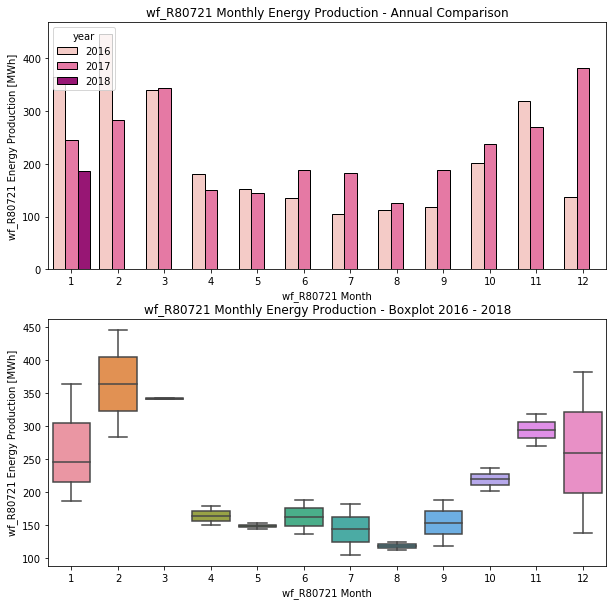

In [21]:
f = plt.figure(figsize=(10,10))

ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

# sns.scatterplot(x="month", y="E_avg", hue = 'year', data=wf_R80721_df_energy, s = 75, ax = ax1, palette = "RdPu", edgecolor = 'black', legend='full')
sns.barplot(x="month", y="E_avg", hue = 'year', data=wf_R80721_df_energy, ax = ax1, palette = "RdPu", edgecolor = 'black')
ax1.set_title('wf_R80721 Monthly Energy Production - Annual Comparison')
ax1.set_xlabel('wf_R80721 Month')
ax1.set_ylabel('wf_R80721 Energy Production [MWh]')

# sns.catplot(x="month", y="E_avg", kind="box", data=wf_R80721_df_energy_boxplot, ax = ax2)
sns.boxplot(x="month", y="E_avg", data=wf_R80721_df_energy_boxplot, ax = ax2)
ax2.set_title('wf_R80721 Monthly Energy Production - Boxplot 2016 - 2018')
ax2.set_xlabel('wf_R80721 Month')
ax2.set_ylabel('wf_R80721 Energy Production [MWh]')

plt.close(2)

In [22]:
# Convert kW to MWh
wf_R80711['E_avg'] = wf_R80711['P_avg'] / 6000 

In [23]:
wf_R80711_df_energy = pd.DataFrame(wf_R80711.groupby(['year', 'month'])['E_avg'].apply(lambda x : x.sum()))

In [24]:
wf_R80711_df_energy.reset_index(inplace=True)
wf_R80711_df_energy

,year,month,E_avg
0,2016,1,466.236030
1,2016,2,525.856932
2,2016,3,300.744053
3,2016,4,224.394517
4,2016,5,194.639578
5,2016,6,172.342258
6,2016,7,136.028952
7,2016,8,154.508343
8,2016,9,161.105498
9,2016,10,262.297455


In [25]:
# mask where #_avg > 10
wf_R80711_df_energy_boxplot = wf_R80711_df_energy[wf_R80711_df_energy.E_avg > 10]

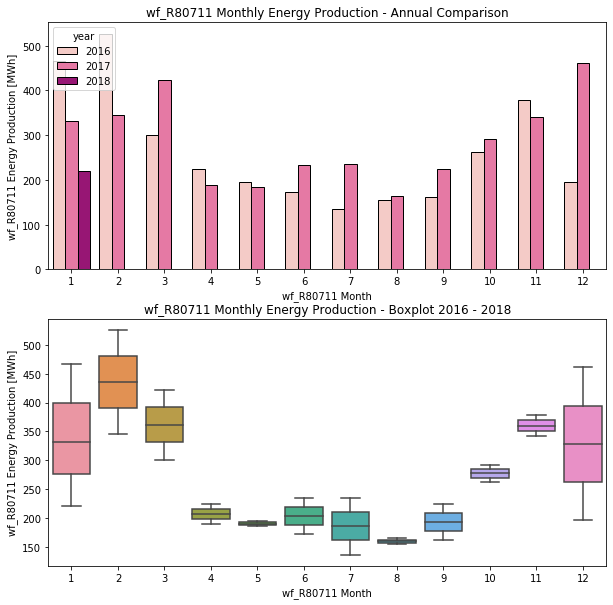

In [26]:
f = plt.figure(figsize=(10,10))

ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

# sns.scatterplot(x="month", y="E_avg", hue = 'year', data=wf_R80711_df_energy, s = 75, ax = ax1, palette = "RdPu", edgecolor = 'black', legend='full')
sns.barplot(x="month", y="E_avg", hue = 'year', data=wf_R80711_df_energy, ax = ax1, palette = "RdPu", edgecolor = 'black')
ax1.set_title('wf_R80711 Monthly Energy Production - Annual Comparison')
ax1.set_xlabel('wf_R80711 Month')
ax1.set_ylabel('wf_R80711 Energy Production [MWh]')

sns.catplot(x="month", y="E_avg", kind="box", data=wf_R80711_df_energy_boxplot, ax = ax2)
ax2.set_title('wf_R80711 Monthly Energy Production - Boxplot 2016 - 2018')
ax2.set_xlabel('wf_R80711 Month')
ax2.set_ylabel('wf_R80711 Energy Production [MWh]')

plt.close(2)

In [27]:
# Convert kW to MWh
wf_R80736['E_avg'] = wf_R80736['P_avg'] / 6000 

In [28]:
wf_R80736_df_energy = pd.DataFrame(wf_R80736.groupby(['year', 'month'])['E_avg'].apply(lambda x : x.sum()))

In [29]:
wf_R80736_df_energy.reset_index(inplace=True)
wf_R80736_df_energy

,year,month,E_avg
0,2016,1,398.999595
1,2016,2,507.897186
2,2016,3,375.342937
3,2016,4,205.332550
4,2016,5,174.114860
5,2016,6,143.581627
6,2016,7,108.603247
7,2016,8,112.821352
8,2016,9,122.640460
9,2016,10,204.184197


In [30]:
# mask where #_avg > 10
wf_R80736_df_energy_boxplot = wf_R80736_df_energy[wf_R80736_df_energy.E_avg > 10]

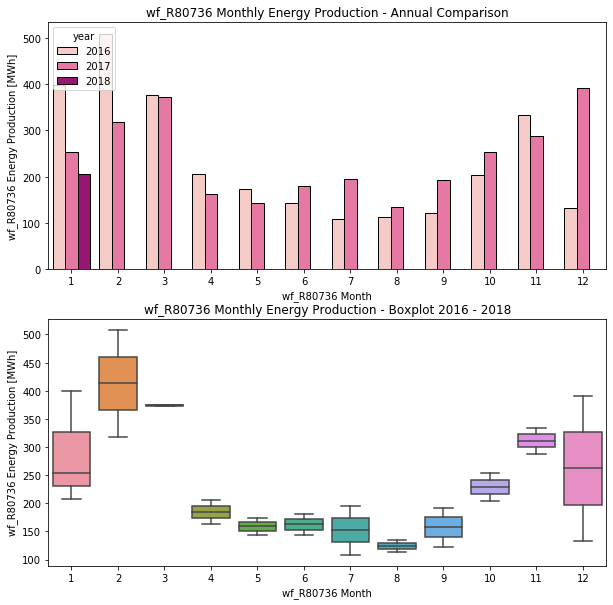

In [31]:
f = plt.figure(figsize=(10,10))

ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

sns.barplot(x="month", y="E_avg", hue = 'year', data=wf_R80736_df_energy, ax = ax1, palette = "RdPu", edgecolor = 'black')
ax1.set_title('wf_R80736 Monthly Energy Production - Annual Comparison')
ax1.set_xlabel('wf_R80736 Month')
ax1.set_ylabel('wf_R80736 Energy Production [MWh]')

sns.catplot(x="month", y="E_avg", kind="box", data=wf_R80736_df_energy_boxplot, ax = ax2)
ax2.set_title('wf_R80736 Monthly Energy Production - Boxplot 2016 - 2018')
ax2.set_xlabel('wf_R80736 Month')
ax2.set_ylabel('wf_R80736 Energy Production [MWh]')

plt.close(2)

In [32]:
# Convert kW to MWh
wf_R80790['E_avg'] = wf_R80790['P_avg'] / 6000 

In [33]:
wf_R80790_df_energy = pd.DataFrame(wf_R80790.groupby(['year', 'month'])['E_avg'].apply(lambda x : x.sum()))

In [34]:
wf_R80790_df_energy.reset_index(inplace=True)
wf_R80790_df_energy

,year,month,E_avg
0,2016,1,421.828895
1,2016,2,502.656217
2,2016,3,380.765702
3,2016,4,203.822615
4,2016,5,182.906758
5,2016,6,164.192545
6,2016,7,126.682628
7,2016,8,138.741132
8,2016,9,144.893440
9,2016,10,231.094178


In [35]:
# mask where #_avg > 10
wf_R80790_df_energy_boxplot = wf_R80790_df_energy[wf_R80790_df_energy.E_avg > 10]

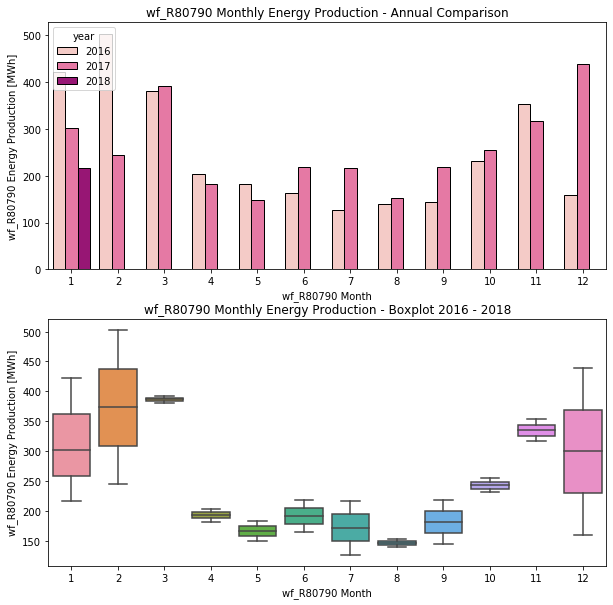

In [36]:
f = plt.figure(figsize=(10,10))

ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

sns.barplot(x="month", y="E_avg", hue = 'year', data=wf_R80790_df_energy, ax = ax1, palette = "RdPu", edgecolor = 'black')
ax1.set_title('wf_R80790 Monthly Energy Production - Annual Comparison')
ax1.set_xlabel('wf_R80790 Month')
ax1.set_ylabel('wf_R80790 Energy Production [MWh]')

sns.catplot(x="month", y="E_avg", kind="box", data=wf_R80790_df_energy_boxplot, ax = ax2)
ax2.set_title('wf_R80790 Monthly Energy Production - Boxplot 2016 - 2018')
ax2.set_xlabel('wf_R80790 Month')
ax2.set_ylabel('wf_R80790 Energy Production [MWh]')

plt.close(2)

## Power Output Calculation Overall

In [37]:
# Convert kW to MWh
windfarm['E_avg'] = windfarm['P_avg'] / 6000 

In [38]:
df_energy = pd.DataFrame(windfarm.groupby(['year', 'month'])['E_avg'].apply(lambda x : x.sum()))

In [39]:
df_energy.reset_index(inplace=True)
df_energy

,year,month,E_avg
0,2016,1,1651.692010
1,2016,2,1982.162139
2,2016,3,1397.472307
3,2016,4,813.310147
4,2016,5,704.798407
5,2016,6,616.275307
6,2016,7,476.871048
7,2016,8,518.687287
8,2016,9,547.253042
9,2016,10,899.565857


In [40]:
# mask where #_avg > 10
df_energy_boxplot = df_energy[df_energy.E_avg > 10]

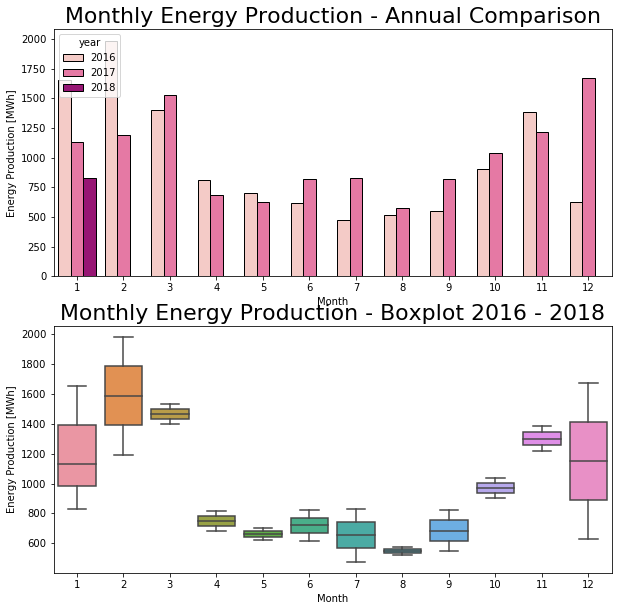

In [41]:
f = plt.figure(figsize=(10,10))

ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

sns.barplot(x="month", y="E_avg", hue = 'year', data=df_energy, ax = ax1, palette = "RdPu", edgecolor = 'black')
ax1.set_title('Monthly Energy Production - Annual Comparison', fontsize=22)
ax1.set_xlabel('Month')
ax1.set_ylabel('Energy Production [MWh]')

sns.catplot(x="month", y="E_avg", kind="box", data=df_energy_boxplot, ax = ax2)
ax2.set_title('Monthly Energy Production - Boxplot 2016 - 2018', fontsize=22)
ax2.set_xlabel('Month')
ax2.set_ylabel('Energy Production [MWh]')

plt.close(2)


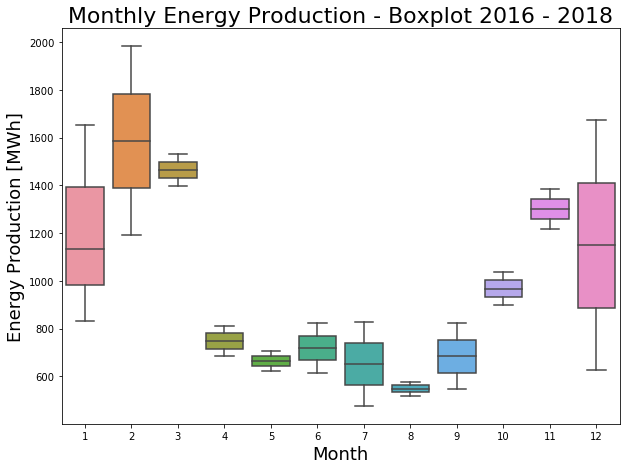

In [42]:
f = plt.figure(figsize=(10,16))

# ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

# sns.barplot(x="month", y="E_avg", hue = 'year', data=df_energy, ax = ax1, palette = "RdPu", edgecolor = 'black')
# ax1.set_title('Monthly Energy Production - Annual Comparison', fontsize=22)
# ax1.set_xlabel('Month')
# ax1.set_ylabel('Energy Production [MWh]')

sns.catplot(x="month", y="E_avg", kind="box", data=df_energy_boxplot, ax = ax2)
ax2.set_title('Monthly Energy Production - Boxplot 2016 - 2018', fontsize=22)
ax2.set_xlabel('Month', fontsize=18)
ax2.set_ylabel('Energy Production [MWh]', fontsize=18)

plt.close(2)


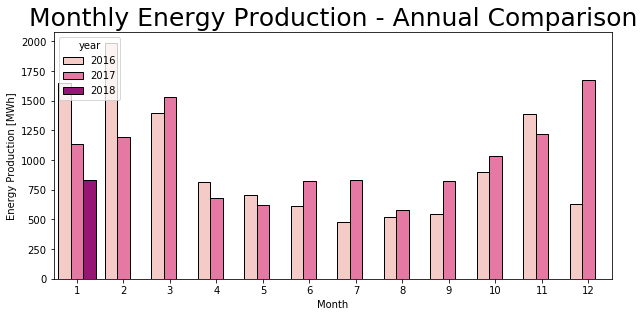

In [43]:
f = plt.figure(figsize=(10,10))

ax1 = f.add_subplot(211)

sns.barplot(x="month", y="E_avg", hue = 'year', data=df_energy, ax = ax1, palette = "RdPu", edgecolor = 'black')
ax1.set_title('Monthly Energy Production - Annual Comparison', fontsize=25)
ax1.set_xlabel('Month')
ax1.set_ylabel('Energy Production [MWh]')

plt.savefig("Power_Output_Calculation_Barplot.png")

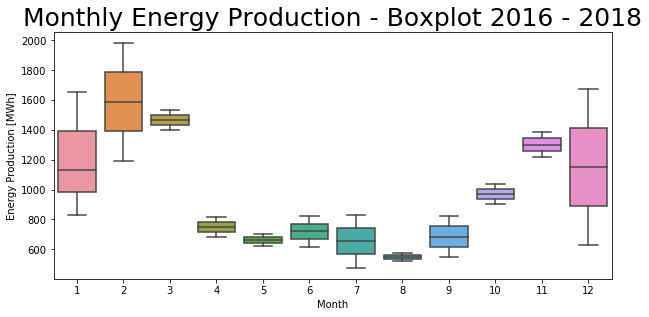

In [44]:
f = plt.figure(figsize=(10,10))

ax1 = f.add_subplot(212)

sns.catplot(x="month", y="E_avg", kind="box", data=df_energy_boxplot, ax = ax1)
ax1.set_title('Monthly Energy Production - Boxplot 2016 - 2018', fontsize=25)
ax1.set_xlabel('Month')
ax1.set_ylabel('Energy Production [MWh]')

plt.savefig("Power_Output_Calculation_Boxplot.png")

plt.close(2)


## Capacity Factory Estimation

Capacity Factor is a design parameter. In absolute value, it does not give us information about Wind Turbine Generator performance. It is computed as the ratio between real power output and nominal rated power It must be above 0 kW and below the maximum rated power (in this example 2050kW):

In [45]:
wf_R80711.P_avg.max()

2050.6799

In [46]:
wf_R80721.P_avg.max()

2050.3899

In [47]:
wf_R80736.P_avg.max()

2051.1201

In [48]:
wf_R80790.P_avg.max()

2050.78

In [49]:
windfarm.P_avg.max()

2051.1201

$CF = \frac{P_{real}}{P_{rated}}$

For a wind turbine generator, the usual CF ranges between 20% and 40%, depending on several design choices made by the manufactures and plant owner:

1. Number of  Wind Turbine Generator installed in the farm
2. Wind availability and annual distribution for that specific location
3.  Wind Turbine Generator technology

Nevertheless, CF can be a good indicator of  Wind Turbine Generator performance as a relative comparison. For instance, one can:

1. Compare  Wind Turbine Generators in the very same farm and with the same technical specs and assess the impact of wake effects
2. Compare data from the very same  Wind Turbine Generator (as we are gonna do in a while) and look at the difference between different years of months

In [50]:
P_nom = 2050 # kW | nominal power
wf_R80711['Cf_avg'] = wf_R80711['P_avg']/P_nom # from kW to CF
wf_R80711_df_cf = pd.DataFrame(wf_R80711.groupby(['year', 'month'])['Cf_avg'].apply(lambda x : x.mean()))
wf_R80711_df_cf.reset_index(inplace=True)

In [51]:
wf_R80721['Cf_avg'] = wf_R80721['P_avg']/P_nom # from kW to CF
wf_R80721_df_cf = pd.DataFrame(wf_R80721.groupby(['year', 'month'])['Cf_avg'].apply(lambda x : x.mean()))
wf_R80721_df_cf.reset_index(inplace=True)

In [52]:
wf_R80736['Cf_avg'] = wf_R80736['P_avg']/P_nom # from kW to CF
wf_R80736_df_cf = pd.DataFrame(wf_R80736.groupby(['year', 'month'])['Cf_avg'].apply(lambda x : x.mean()))
wf_R80736_df_cf.reset_index(inplace=True)

In [53]:
wf_R80790['Cf_avg'] = wf_R80790['P_avg']/P_nom # from kW to CF
wf_R80790_df_cf = pd.DataFrame(wf_R80790.groupby(['year', 'month'])['Cf_avg'].apply(lambda x : x.mean()))
wf_R80790_df_cf.reset_index(inplace=True)

In [54]:
windfarm['Cf_avg'] = windfarm['P_avg']/P_nom # from kW to CF
df_cf = pd.DataFrame(windfarm.groupby(['year', 'month'])['Cf_avg'].apply(lambda x : x.mean()))
df_cf.reset_index(inplace=True)

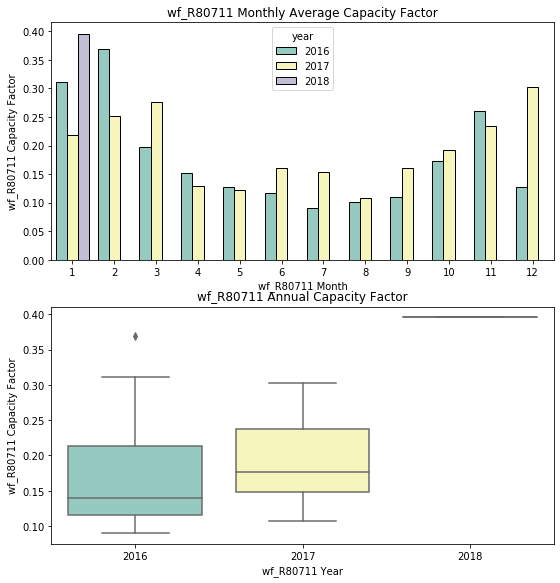

In [55]:
# wf_R80711
wf_R80711_df_cf_boxplot = wf_R80711_df_cf

f = plt.figure(figsize=(8,8))

ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

sns.barplot(x="month", y="Cf_avg", hue = 'year', data=wf_R80711_df_cf_boxplot, ax = ax1, palette = "Set3", edgecolor = 'black')
ax1.set_title('wf_R80711 Monthly Average Capacity Factor')
ax1.set_xlabel('wf_R80711 Month')
ax1.set_ylabel('wf_R80711 Capacity Factor')
plt.tight_layout()

sns.catplot(x="year", y="Cf_avg", kind = 'box', data=wf_R80711_df_cf_boxplot, ax = ax2, palette = "Set3")
ax2.set_title('wf_R80711 Annual Capacity Factor')
ax2.set_xlabel('wf_R80711 Year')
ax2.set_ylabel('wf_R80711 Capacity Factor')
plt.tight_layout()


plt.close(2)

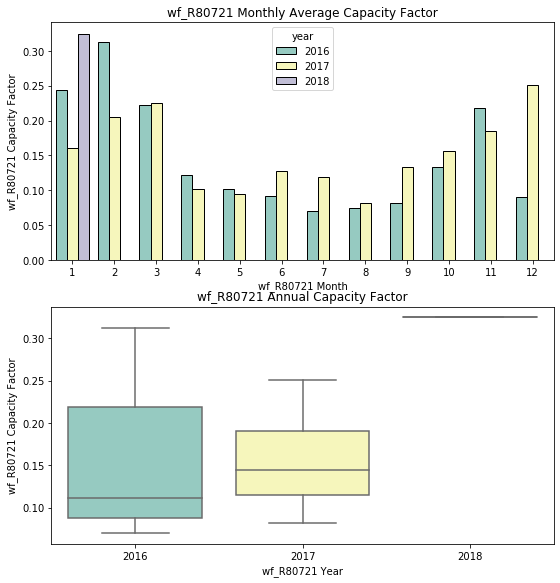

In [56]:
# wf_R80721
wf_R80721_df_cf_boxplot = wf_R80721_df_cf

f = plt.figure(figsize=(8,8))

ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

sns.barplot(x="month", y="Cf_avg", hue = 'year', data=wf_R80721_df_cf_boxplot, ax = ax1, palette = "Set3", edgecolor = 'black')
ax1.set_title('wf_R80721 Monthly Average Capacity Factor')
ax1.set_xlabel('wf_R80721 Month')
ax1.set_ylabel('wf_R80721 Capacity Factor')
plt.tight_layout()

sns.catplot(x="year", y="Cf_avg", kind = 'box', data=wf_R80721_df_cf_boxplot, ax = ax2, palette = "Set3")
ax2.set_title('wf_R80721 Annual Capacity Factor')
ax2.set_xlabel('wf_R80721 Year')
ax2.set_ylabel('wf_R80721 Capacity Factor')
plt.tight_layout()


plt.close(2)

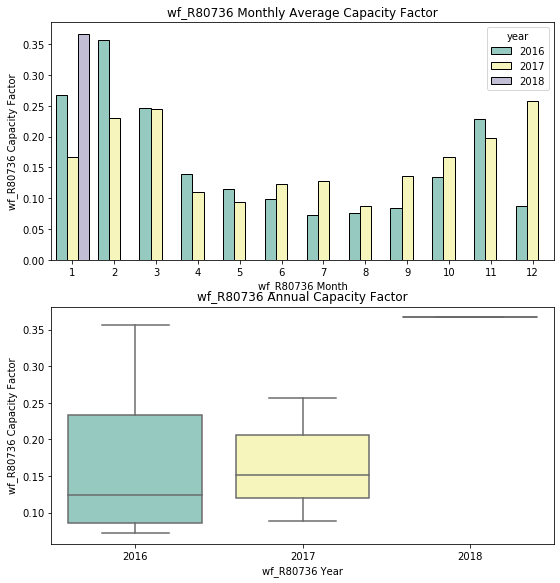

In [57]:
# wf_R80736
wf_R80736_df_cf_boxplot = wf_R80736_df_cf

f = plt.figure(figsize=(8,8))

ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

sns.barplot(x="month", y="Cf_avg", hue = 'year', data=wf_R80736_df_cf_boxplot, ax = ax1, palette = "Set3", edgecolor = 'black')
ax1.set_title('wf_R80736 Monthly Average Capacity Factor')
ax1.set_xlabel('wf_R80736 Month')
ax1.set_ylabel('wf_R80736 Capacity Factor')
plt.tight_layout()

sns.catplot(x="year", y="Cf_avg", kind = 'box', data=wf_R80736_df_cf_boxplot, ax = ax2, palette = "Set3")
ax2.set_title('wf_R80736 Annual Capacity Factor')
ax2.set_xlabel('wf_R80736 Year')
ax2.set_ylabel('wf_R80736 Capacity Factor')
plt.tight_layout()


plt.close(2)

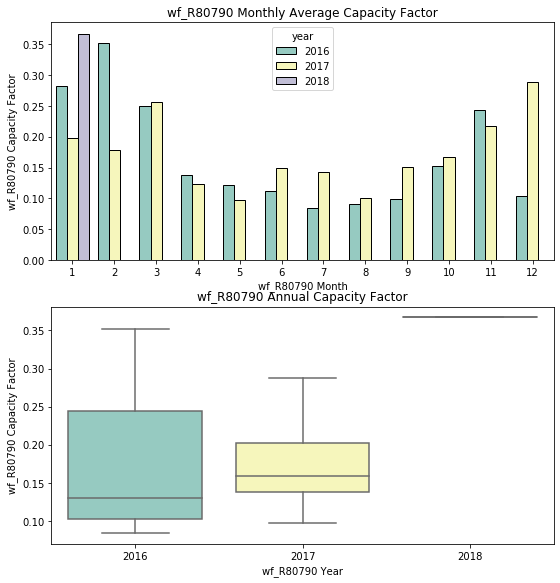

In [58]:
# wf_R80790
wf_R80790_df_cf_boxplot = wf_R80790_df_cf

f = plt.figure(figsize=(8,8))

ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

sns.barplot(x="month", y="Cf_avg", hue = 'year', data=wf_R80790_df_cf_boxplot, ax = ax1, palette = "Set3", edgecolor = 'black')
ax1.set_title('wf_R80790 Monthly Average Capacity Factor')
ax1.set_xlabel('wf_R80790 Month')
ax1.set_ylabel('wf_R80790 Capacity Factor')
plt.tight_layout()

sns.catplot(x="year", y="Cf_avg", kind = 'box', data=wf_R80790_df_cf_boxplot, ax = ax2, palette = "Set3")
ax2.set_title('wf_R80790 Annual Capacity Factor')
ax2.set_xlabel('wf_R80790 Year')
ax2.set_ylabel('wf_R80790 Capacity Factor')
plt.tight_layout()


plt.close(2)

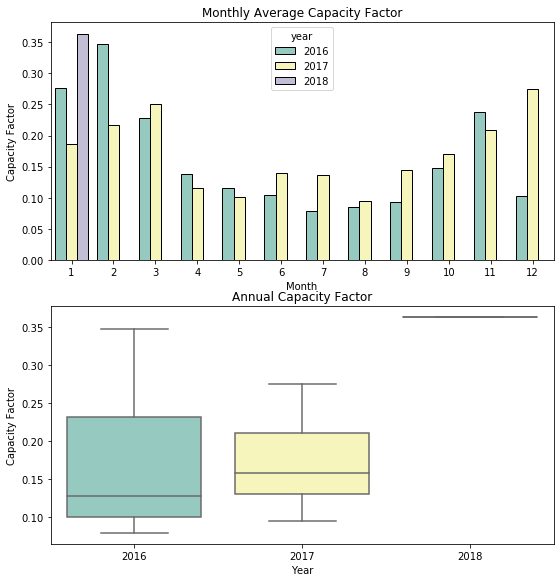

In [59]:
df_cf_boxplot = df_cf

f = plt.figure(figsize=(8,8))

ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

sns.barplot(x="month", y="Cf_avg", hue = 'year', data=df_cf_boxplot, ax = ax1, palette = "Set3", edgecolor = 'black')
ax1.set_title('Monthly Average Capacity Factor')
ax1.set_xlabel('Month')
ax1.set_ylabel('Capacity Factor')
plt.tight_layout()

sns.catplot(x="year", y="Cf_avg", kind = 'box', data=df_cf_boxplot, ax = ax2, palette = "Set3")
ax2.set_title('Annual Capacity Factor')
ax2.set_xlabel('Year')
ax2.set_ylabel('Capacity Factor')
plt.tight_layout()


plt.close(2)

## Plot each month against Active_power	(kW)

In [60]:
# wf_R80711, wf_R80721, wf_R80721, wf_R80790

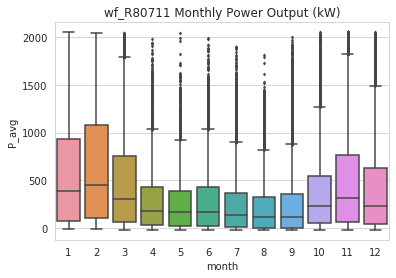

In [61]:
sns.set_style("whitegrid") 
sns.boxplot(x = 'month', y = 'P_avg', data = wf_R80711, fliersize = 2).set_title('wf_R80711 Monthly Power Output (kW)');

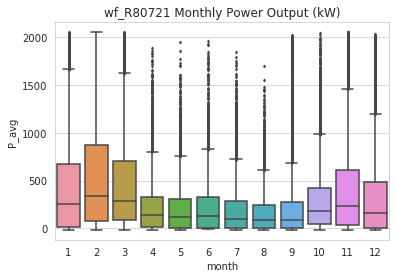

In [62]:
sns.set_style("whitegrid") 
sns.boxplot(x = 'month', y = 'P_avg', data = wf_R80721, fliersize = 2).set_title('wf_R80721 Monthly Power Output (kW)');

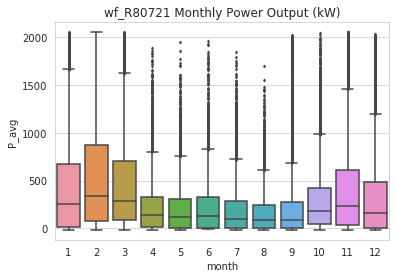

In [63]:
sns.set_style("whitegrid") 
sns.boxplot(x = 'month', y = 'P_avg', data = wf_R80721, fliersize = 2).set_title('wf_R80721 Monthly Power Output (kW)');

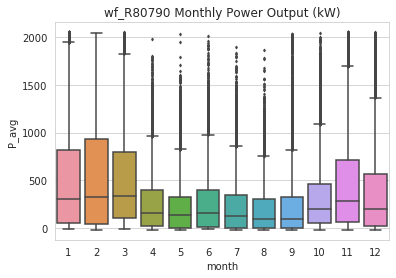

In [64]:
sns.set_style("whitegrid") 
sns.boxplot(x = 'month', y = 'P_avg', data = wf_R80790, fliersize = 2).set_title('wf_R80790 Monthly Power Output (kW)');

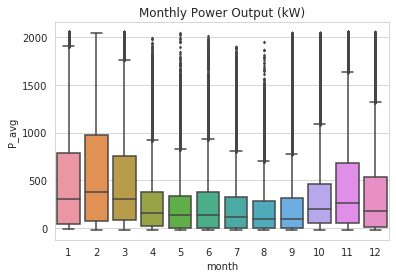

In [65]:
sns.set_style("whitegrid") 
sns.boxplot(x = 'month', y = 'P_avg', data = windfarm, fliersize = 2).set_title('Monthly Power Output (kW)');

### Understanding the boxplot:
- Third box plot, i.e, March month #3 (yellow/green), box plot of the figure and understand these statistical things:
    - Bottom black horizontal line of the 3rd box plot is the minimum value
    - First black horizontal line of rectangle shape of the 3rd box plot is First quartile or 25%
    - Second black horizontal line of rectangle shape of 3rd box plot is Second quartile or 50% or median.
    - Third black horizontal line of rectangle shape of 3rd box plot is third quartile or 75%
    - Top black horizontal line of rectangle shape of 3rd box plot is maximum value.
    - Small diamond shapes of 3rd box plot are outlier data or erroneous data.

### Better understanding of wind turbine power performance:
- The boxplot chart in the figure above gives an idea of how power is produced during a whole year.
    - Note: This is plotted against the entire dataset.
- The larger a boxplot is, the power produced in that month during the historical period analysed is more unpredictable and fluctuating.
    - For example, months 1, 2, 3, 11ish, and 12 (winter months)
- A very short boxplot indicates a fairly steady power production during the same month in different years. 
    - For example, months 4 - 10 (spring, summer, and fall) 
- On the other hand, the higher the boxplot the larger the power outcome in that month.
    - For example, months 3 and 12 (both winter months)

### Conclusions from boxplot:
- The months for highest power production (winter months it can range from 0 to 2000 kVA/ month) are also the months we see the largest fluctuations of power output.
- During spring, summer, and fall, power definitively decreases, but is is steadier around 0 – 1000 kVA per month. 

## Plot each month against windspeed averages (m/s)

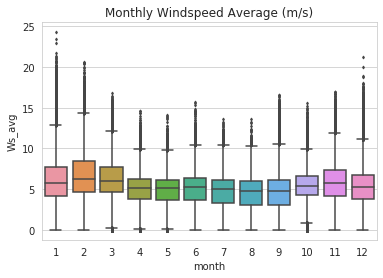

In [66]:
sns.set_style("whitegrid") 
sns.boxplot(x = 'month', y = 'Ws_avg', data = windfarm, fliersize = 2).set_title('Monthly Windspeed Average (m/s)');

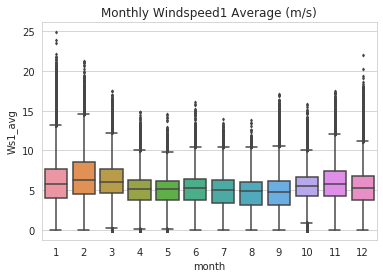

In [67]:
sns.set_style("whitegrid") 
sns.boxplot(x = 'month', y = 'Ws1_avg', data = windfarm, fliersize = 2).set_title('Monthly Windspeed1 Average (m/s)');

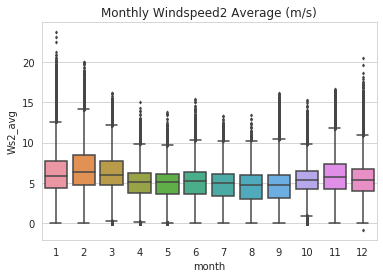

In [68]:
sns.set_style("whitegrid") 
sns.boxplot(x = 'month', y = 'Ws2_avg', data = windfarm, fliersize = 2).set_title('Monthly Windspeed2 Average (m/s)');

### The boxplot chart in the 3 figures above gives an idea of average windspeed vs. month:
- The larger a boxplot is, the wind speed in that month during the historical period analysed is more unpredictable and fluctuating.
    - For example, months 1, 2, 3, and 12 (winter months)
- A very short boxplot indicates a fairly steady wind speed during the same month in different years.
    - For example, months 4 - 11 (spring, summer, and fall); maybe not 8 and 9 though
- On the other hand, the higher the boxplot the larger the wind speed outcome in that month.
    - For example, months 3 and 12 (both winter months)

## One interesting thing of note:
- The wind speeds/month seem to match up with the power produced/month
- Intuitively this makes sense, since the wind turbines require wind for their power

## [Wind Rose](https://windrose.readthedocs.io/en/latest/) Charts
- Using this library, the following analysis aims at:

    1. understanding if there have been significant changes in wind availability during the year (seasonality effects)
    2. comparing historical data for an annual comparison (period 2016-2018) 
    
### About Windrose:
- It is a simple, yet effective way to visualize wind distribution from data acquired by an on-field anemometer.
- The figures show wind distribution - wind direction vs. wind speed 
- The plot tells us about wind directions and wind intensity (the darker the bar/contour, the lower the wind speed). 
- Wind speed is expressed in m/s.
- For reference, an onshore wind turbine startup is about 3 m/s, it reaches the maximum power roughly at 15 m/s and the maximum sustainable wind speed is about 25 m/s (very rare events in very particular locations).

In [69]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

### Yearly comparison
- Absolute_wind_direction_corrected (degrees) vs. Average wind speed (m/s)

In [70]:
# mask1 = (windfarm.loc[windfarm['year']==2016])
# mask1.Wa_avg

In [71]:
# mask1 = (windfarm.loc[windfarm['year']==2018])
# mask1.Wa_avg

## Annual Comparisons

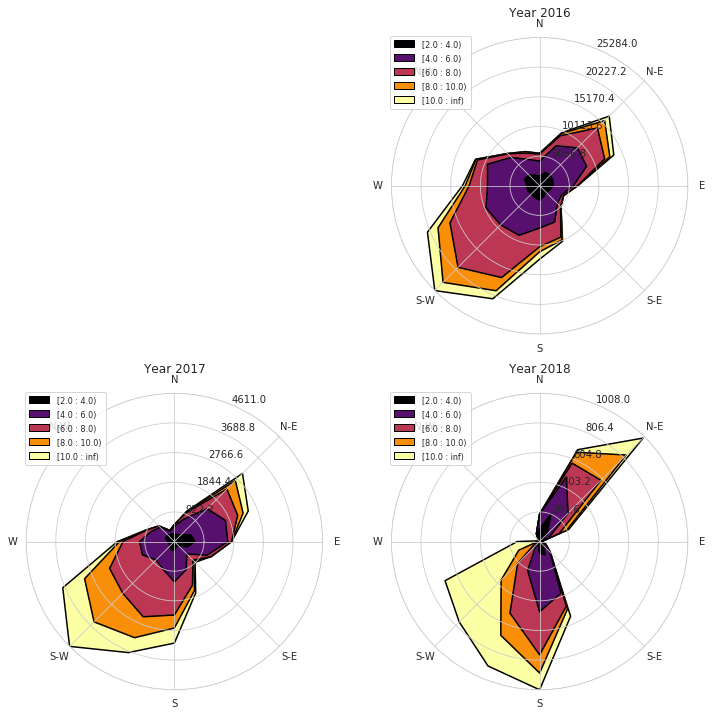

<Figure size 432x288 with 0 Axes>

In [72]:
f = plt.figure(figsize=(12,12))
leg_pos = 'upper left'


ax1 = f.add_subplot(222,projection='windrose')
ax1.set_title('Year 2016')
anno=2016

ax1.contourf(windfarm.loc[windfarm['year']==anno,'Wa_c_avg'], windfarm.loc[windfarm['year']==anno,'Ws_avg'], 
             bins = np.arange(2, 12, 2),cmap=cm.inferno)
ax1.contour(windfarm.loc[windfarm['year']==anno,'Wa_c_avg'], windfarm.loc[windfarm['year']==anno,'Ws_avg'],
            colors='black',bins = np.arange(2, 12, 2))
ax1.set_legend(loc=leg_pos)


ax2 = f.add_subplot(223,projection='windrose')
ax2.set_title('Year 2017')
anno=2017

ax2.contourf(windfarm.loc[windfarm['year']==anno,'Wa_c_avg'], windfarm.loc[windfarm['year']==anno,'Ws_avg'], 
             bins = np.arange(2, 12, 2),cmap=cm.inferno)
ax2.contour(windfarm.loc[windfarm['year']==anno,'Wa_c_avg'], windfarm.loc[windfarm['year']==anno,'Ws_avg'],
            colors='black',bins = np.arange(2, 12, 2))
ax2.set_legend(loc=leg_pos)


ax3 = f.add_subplot(224,projection='windrose')
ax3.set_title('Year 2018')
anno=2018

ax3.contourf(windfarm.loc[windfarm['year']==anno,'Wa_avg'], windfarm.loc[windfarm['year']==anno,'Ws_avg'], 
             bins = np.arange(2, 12, 2),cmap=cm.inferno)
ax3.contour(windfarm.loc[windfarm['year']==anno,'Wa_avg'], windfarm.loc[windfarm['year']==anno,'Ws_avg'],
            colors='black',bins = np.arange(2, 12, 2))
ax3.set_legend(loc=leg_pos)

plt.show()

plt.savefig("WindYears.png")


#### Observation:

- The plot tells us about wind directions and wind intensity (the darker the bar/contour, the lower the wind speed). 

- *Note*: Windspeeds are uncorrected for 2018. 

- Annual windrose comparison does not show a significant difference in terms of wind intensity. 

- Only 2018 shows a slightly different wind direction pattern, with a triple prevalent direction (NE, SW, and S) compared to 2016 and 2017 (NE and SW).

- This is consistent with literature findings and, generally speaking, many Southern and Central Europe locations.

    - [Wind direction and mean wind speed (kph)](https://weather.us/model-charts/euro/europe/wind-mean-direction.html)

## Seasonal Comparison

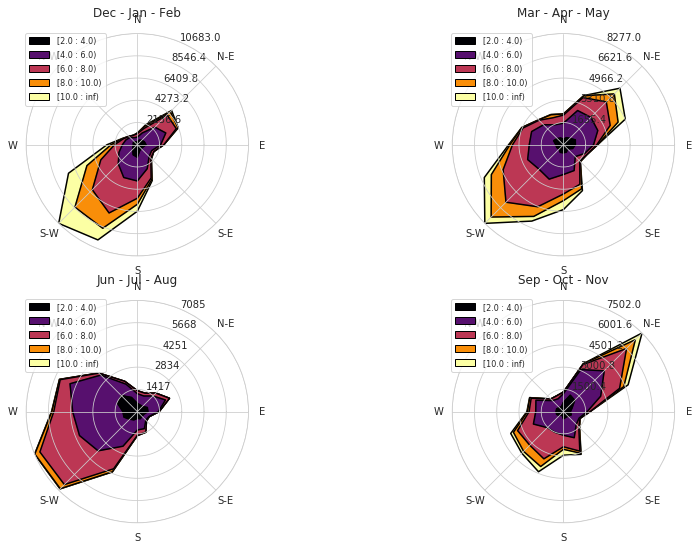

<Figure size 432x288 with 0 Axes>

In [73]:
warnings.filterwarnings(action='once')
f = plt.figure(figsize=(14,9))
leg_pos = 'upper left'

ax1 = f.add_subplot(221,projection='windrose')
ax1.set_title('Dec - Jan - Feb')
mese = [12,1,2]


ax1.contourf(windfarm.loc[windfarm['month'].isin(mese),'Wa_c_avg'], windfarm.loc[windfarm['month'].isin(mese),'Ws_avg'], 
             bins = np.arange(2, 12, 2),cmap=cm.inferno)
ax1.contour(windfarm.loc[windfarm['month'].isin(mese),'Wa_c_avg'], windfarm.loc[windfarm['month'].isin(mese),'Ws_avg'],
            colors='black',bins = np.arange(2, 12, 2))
ax1.set_legend(loc=leg_pos)

ax2 = f.add_subplot(222,projection='windrose')
ax2.set_title('Mar - Apr - May')
mese = [3,4,5]

ax2.contourf(windfarm.loc[windfarm['month'].isin(mese),'Wa_c_avg'], windfarm.loc[windfarm['month'].isin(mese),'Ws_avg'], 
             bins = np.arange(2, 12, 2),cmap=cm.inferno)
ax2.contour(windfarm.loc[windfarm['month'].isin(mese),'Wa_c_avg'], windfarm.loc[windfarm['month'].isin(mese),'Ws_avg'],
            colors='black',bins = np.arange(2, 12, 2))
ax2.set_legend(loc=leg_pos)

ax3 = f.add_subplot(223,projection='windrose')
ax3.set_title('Jun - Jul - Aug')
mese = [6,7,8]

ax3.contourf(windfarm.loc[windfarm['month'].isin(mese),'Wa_c_avg'], windfarm.loc[windfarm['month'].isin(mese),'Ws_avg'], 
             bins = np.arange(2, 12, 2),cmap=cm.inferno)
ax3.contour(windfarm.loc[windfarm['month'].isin(mese),'Wa_c_avg'], windfarm.loc[windfarm['month'].isin(mese),'Ws_avg'],
            colors='black',bins = np.arange(2, 12, 2))
ax3.set_legend(loc=leg_pos)

ax4 = f.add_subplot(224,projection='windrose')
ax4.set_title('Sep - Oct - Nov')
mese = [9,10,11]

ax4.contourf(windfarm.loc[windfarm['month'].isin(mese),'Wa_c_avg'], windfarm.loc[windfarm['month'].isin(mese),'Ws_avg'], 
             bins = np.arange(2, 12, 2),cmap=cm.inferno)
ax4.contour(windfarm.loc[windfarm['month'].isin(mese),'Wa_c_avg'], windfarm.loc[windfarm['month'].isin(mese),'Ws_avg'],
            colors='black',bins = np.arange(2, 12, 2))
ax4.set_legend(loc=leg_pos)

plt.show()

plt.savefig('WindSeasons.png', orientation='landscape')


### Comments:

- Compared to the previous windrose diagrams, we can clearly distinguish seasonal effects during the observed period (2016 - 2018). 
- Dominant wind direction is pretty much always the same (mostly NE-SW). 
- However, in intermediate seasons (Spring and Fall) it tends to be balanced in (NE-SW) orientation.
- Winter shows more inclination towards SW and Summer shows a slight inclination towards the west.

Moreover, these diagrams prove the behaviour of Power Output and Capacity factor curves showed before: 
- Winter, Spring, and Fall charts hightlight a stronger wind intensity (lighter region with wind above 10 m/s) compared to Summer months.


### Plotting Absolute_wind_direction_corrected (degrees) vs. Average wind speed (m/s)

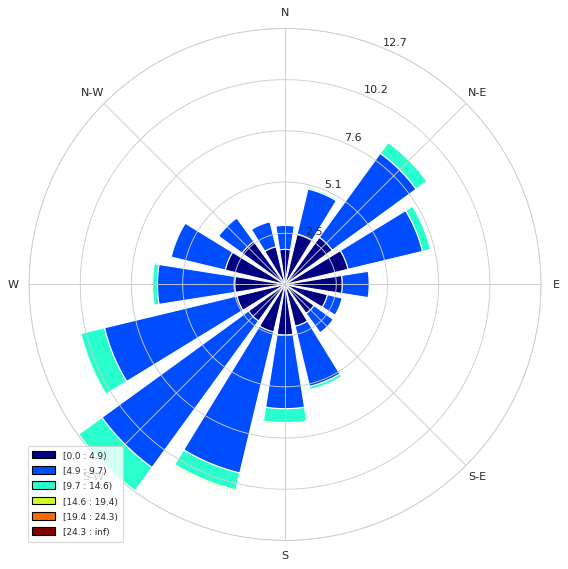

In [74]:
# Wind Rose Bar Plot
ax = WindroseAxes.from_ax()
ax.bar(windfarm.Wa_c_avg, windfarm.Ws_avg, normed=True, opening=0.8, edgecolor='white')
ax.set_legend();

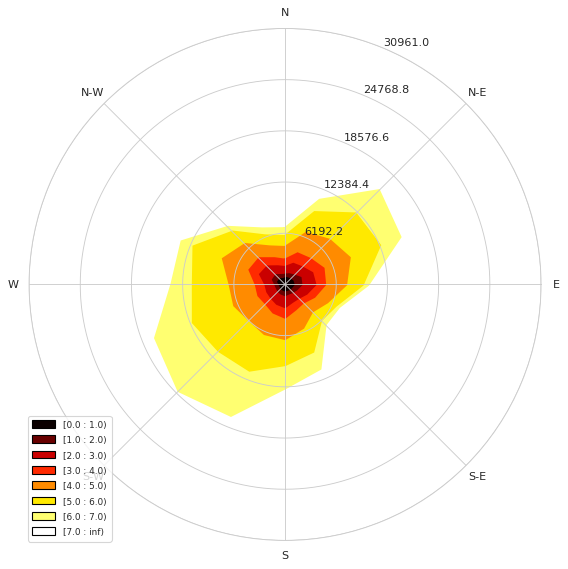

In [75]:
# Wind rose Contour Plots
ax = WindroseAxes.from_ax()
ax.contourf(windfarm.Wa_c_avg, windfarm.Ws_avg, bins=np.arange(0, 8, 1), cmap=cm.hot, lw=3)
ax.set_legend();

# Show Nulls Breakdown

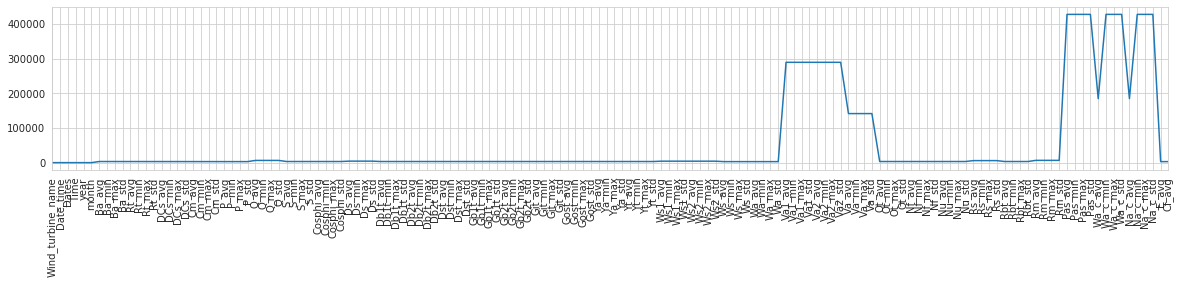

In [76]:
plt.figure(figsize=(20,3))
plt.plot(windfarm.isnull().sum(axis = 0))
plt.xticks(rotation=90)
plt.margins(x=0)
plt.show()

In [77]:
print('List of columns deleted because of NaN count exceeds maximum threshold:')
print(list(windfarm.loc[:,windfarm.isnull().sum(axis = 0) > 10000].columns))
df = windfarm.loc[:,windfarm.isnull().sum(axis = 0) < 10000]

List of columns deleted because of NaN count exceeds maximum threshold:
['Va1_avg', 'Va1_min', 'Va1_max', 'Va1_std', 'Va2_avg', 'Va2_min', 'Va2_max', 'Va2_std', 'Va_avg', 'Va_min', 'Va_max', 'Va_std', 'Pas_avg', 'Pas_min', 'Pas_max', 'Pas_std', 'Wa_c_avg', 'Wa_c_min', 'Wa_c_max', 'Wa_c_std', 'Na_c_avg', 'Na_c_min', 'Na_c_max', 'Na_c_std']


In [78]:
df.shape[0]

428380

In [79]:
df_no_na = df.dropna()
df_no_na.shape[0]

420149

In [80]:
windfarm = df_no_na